# Importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

# Basic info on the Data

In [6]:
df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
9053443,2020-03-11,0,1,0,1,0,שלילי,NaN,NaN,Abroad
9053444,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053445,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053446,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


In [8]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other


### We will now change all the string data to int data:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1

In [9]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [10]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858382 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 743.4+ MB


In [12]:
df[df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,908643.0,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,1.0,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.0,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [13]:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7949739.0,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,0.0,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,0.0,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00


In [14]:
df['gender'].value_counts()

0.0    3794744
1.0    3544848
Name: gender, dtype: int64

### Now we will clean all the NaN Data

In [15]:
df.isnull().sum()
df = df.dropna()

In [16]:
df.shape

(6207383, 10)

After we cleaned around 3 milions row of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [17]:

sample_df = df.sample(int(len(df) * 0.002))
sample_df.shape


(12414, 10)

In [18]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)

In [19]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [20]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 3784546 to 8110740
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### info about the sample data

In [21]:
sample_df['gender'].value_counts()

0.0    6404
1.0    6010
Name: gender, dtype: int64

In [22]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [51]:
Distribution_sample={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache', 'corona_result','age_60_and_above'],
                     'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,622
1,fever,459
2,sore_throat,270
3,shortness_of_breath,59
4,head_ache,519
5,corona_result,1606
6,age_60_and_above,1607


In [24]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [52]:
Distribution_orginal={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above'],
                      'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


Text(0.5, 1.0, 'Distribution_sample')

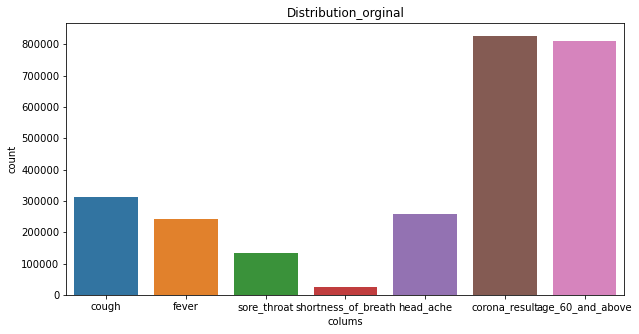

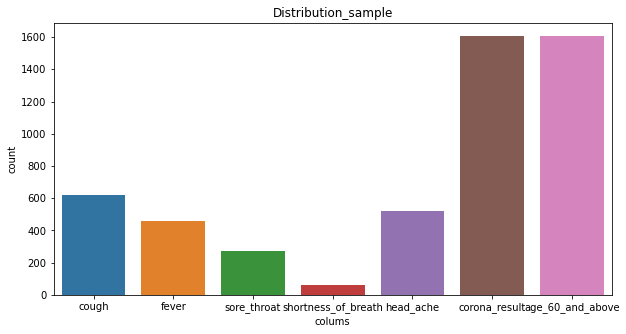

In [26]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

In [27]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.0,1606.000000,1606.000000
mean,0.149440,0.125778,0.065380,0.019925,0.126401,1.0,0.132628,0.480697
std,0.356632,0.331703,0.247272,0.139787,0.332404,0.0,0.339278,0.499783
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [28]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
3784546,2021-03-16,0,0,0,0,0,0,0.0,1.0,Other
3728553,2021-03-21,0,0,0,0,0,0,0.0,0.0,Other
6344697,2020-11-10,0,0,0,0,0,0,1.0,0.0,Other
2022564,2021-09-06,0,0,0,0,0,0,0.0,1.0,Other
6704217,2020-10-12,0,0,0,0,0,0,0.0,1.0,Other


In [29]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 3784546 to 8110740
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


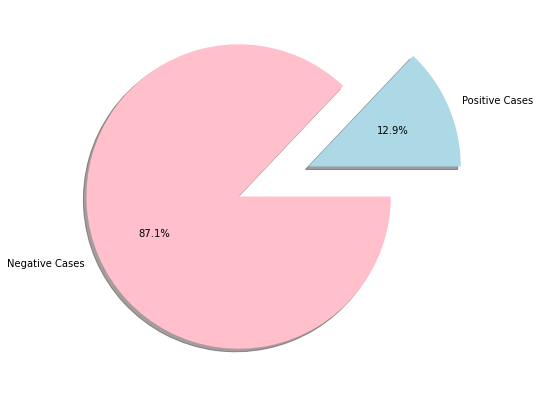

In [35]:
sample_df_negative = sample_df['corona_result'] == 0
sample_df_positive = sample_df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

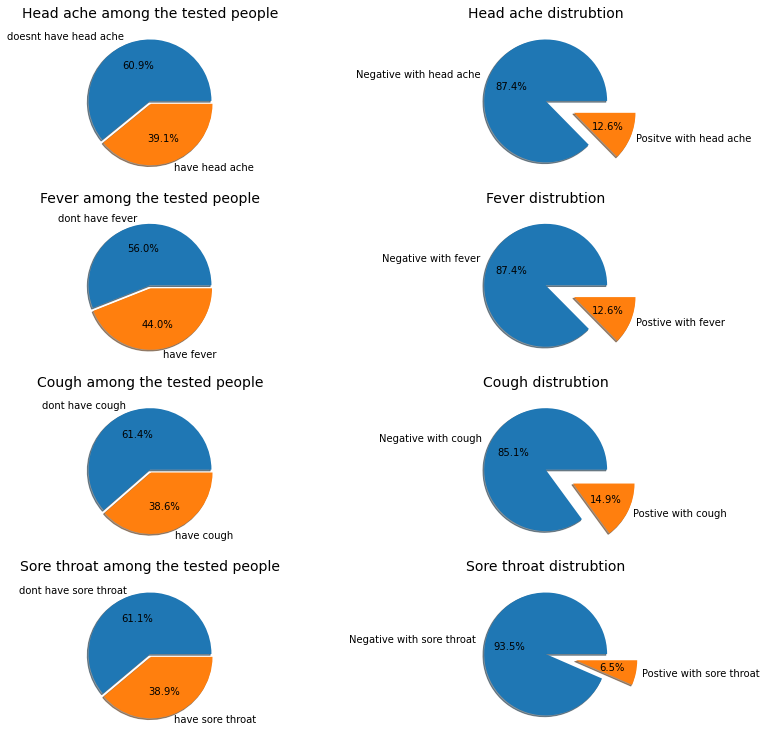

In [36]:
fig, ax = plt.subplots(4,2 ,figsize = (13,13))
((ax1, ax2) , (ax3, ax4),(ax5, ax6) , (ax7, ax8)) = ax
labels = ["doesnt have head ache ", "have head ache"]
values = sample_df[(sample_df['head_ache']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax1.set_title("Head ache among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with head ache ", "Positve with head ache"]
values = sample_df[(sample_df['corona_result']==1)]['head_ache'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax2.set_title("Head ache distrubtion", fontdict={'fontsize': 14})

labels = ["dont have fever", "have fever"]
values = sample_df[(sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax3.set_title("Fever among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with fever ", "Postive with fever"]
values = sample_df[(sample_df['corona_result']==1)]['fever'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax4.set_title("Fever distrubtion", fontdict={'fontsize': 14})

labels = ["dont have cough", "have cough"]
values = sample_df[(sample_df['cough']==1)]['corona_result'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax5.set_title("Cough among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with cough ", "Postive with cough"]
values = sample_df[(sample_df['corona_result']==1)]['cough'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax6.set_title("Cough distrubtion", fontdict={'fontsize': 14})

labels = ["dont have sore throat", "have sore throat"]
values = sample_df[(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax7.set_title("Sore throat among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with sore throat ", "Postive with sore throat"]
values = sample_df[(sample_df['corona_result']==1)]['sore_throat'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax8.set_title("Sore throat distrubtion", fontdict={'fontsize': 14})


plt.show()

# Corolation

In [ ]:
sample_df.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)

### Conclusion
Using the hot map we noticed that there is no correlation between the following parameters:
- Gender
- Over the age of 60
- Indication for testing

So we decided to delete them.

In [ ]:
sample_df.drop(['age_60_and_above','gender' , 'test_indication'], axis=1, inplace=True)


Among the variables that have a correlation we will see in a pie chart

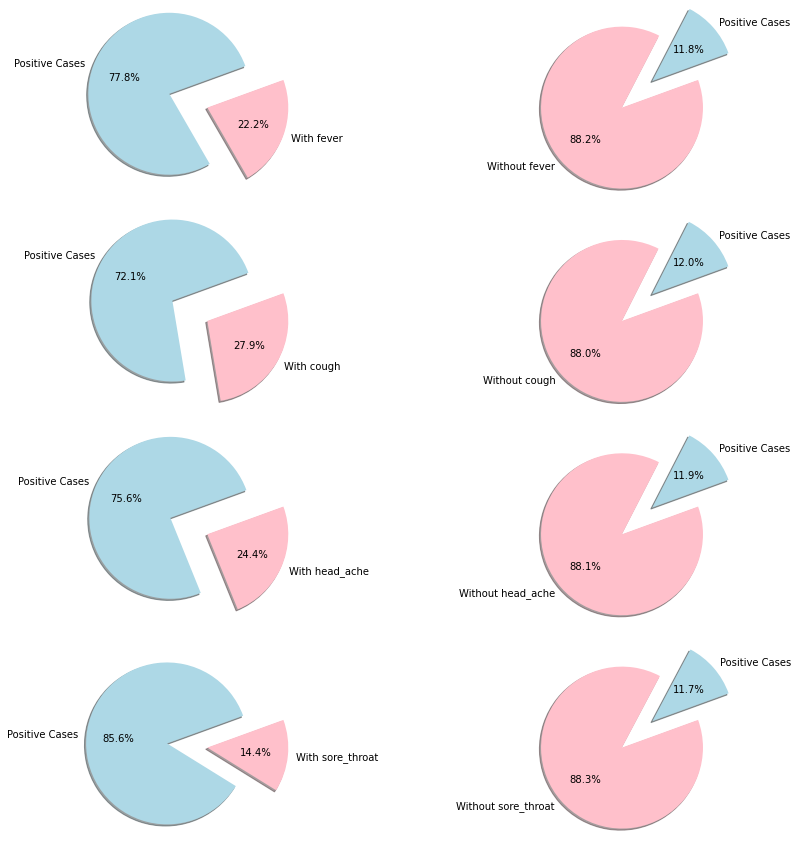

In [37]:
fig, ax = plt.subplots(4,2 ,figsize = (12,12))
((ax1, ax5) , (ax2, ax6),(ax3, ax7) , (ax4, ax8)) = ax

sample_df_fever = sample_df['fever'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax3.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_fever = sample_df['fever'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax5.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax6.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax7.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 
ax8.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

plt.tight_layout()
plt.show()


#  Train Test Split

In [54]:
X = sample_df.drop(columns=['corona_result'])
Y = sample_df['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

### Dummy model

In [55]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)


0.8706299339455453

### We figured out that the data is imbalanced so we decied to add Synthetic data

In [56]:
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

NameError: name 'sample_df_train' is not defined